![](./imagenes/python_logo.jpeg)
# Librería Matplotlib.
***

Los gráficos y las visualizaciones de datos ocupan un lugar central en el *Cálculo Científico* y en la *Ciencia de Datos*; ya sea en los análisis exploratorios, en la *Minería de Datos*, como también en la *Estadística Inferencial* y *Bayesiana*. Gran parte de la estadística moderna tiene que ver con visualización de datos, por lo que siempre es buena idea aprender cómo generar algunos plots sencillos.

Existen varias librerías para hacer gráficos y visualizaciones de datos en *Python*, [*Matplotlib*](https://matplotlib.org/3.1.1/tutorials/index.html) es una de las más usadas y el estándar en el *Cálculo Científico*. *Matplotlib* no forma parte de la instalación estándar de Python, así que debe instalarse por separado. Para instalar *Matplotlib* debe ejecutarse el siguiente comando desde una cónsola o terminal:

```bash
pip install matplotlib
```

Del mismo modo, existe una librería **complementaria** a *Matplotlib* llamada [*Seaborn*](https://seaborn.pydata.org/tutorial.html), la cual no es más que una colección de funciones escritas usando *Matplotlib*. Para instalar *Seaborn* se debe ejecutar desde una terminal:

```bash
pip install seaborn
```

Para importar las librerías en el notebook haremos lo siguiente:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

La primera línea es para decirle a *Jupyter* que los gráficos queden embebidos en la notebook (si no estuvieramos usando la notebook no escribiríamos esta línea).

La segunda línea es la forma estándar de importar `matplotlib`. Notemos que al escribir `as plt` estamos diciendo que accederemos a las funciones contenidas en `matplotlib.pyplot` como `plt`, esto lo hacemos ya que escribir `plt` es más cómodo que escribir `matplotlib.pyplot`. En la tercera línea simplemente importamos la librería complementaria `seaborn`.

Veamos cómo hacer un gráfico sencillo:

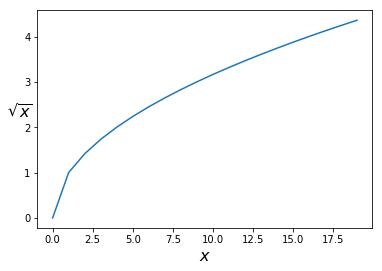

In [21]:
x = range(20)
y = [i ** 0.5 for i in x]
plt.plot(x, y)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$\sqrt{x}$", fontsize = 16, rotation = False)
plt.show()

* En la primera y segunda línea generamos los datos a ser ploteados.
* En la tercer línea decimos que queremos generar un gráfico del tipo plot (ya veremos que los hay de otros tipos), donde graficaremos _x_ vs. *y*.
* En la cuarta y quinta línea agregamos rótulos a los ejes.
* En la quinta línea usamos la misma notación usada por $\LaTeX$ para escribir fórmulas matemáticas. $\LaTeX$ es un lenguaje para escribir textos que es muy usado en muchas disciplinas científicas para escribir papers, posters, diapositivas, libros, etc.
* Finalmente en la sexta línea damos la instrucción `show` para mostrar el gráfico.

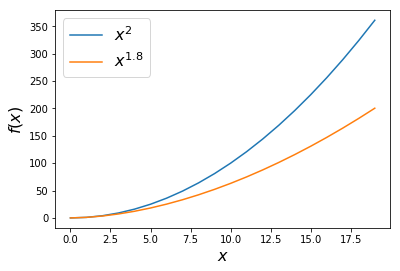

In [22]:
x = range(20)
y = [i ** 2 for i in x]
z = [i ** 1.8 for i in x]
plt.plot(x, y, label = "$x^2$")
plt.plot(x, z, label = "$x^{1.8}$")
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$f(x)$", fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

Existen muchos tipos de gráficos para representar datos. A continuación veremos cinco representaciones comunes de datos unidimensionales:

* Histogramas.
* Kernel Density Plots.
* Stripplot.
* Box Plots.
* Violin Plots.

### Histogramas.

En un [histograma](https://es.wikipedia.org/wiki/Histograma) se representa la *frecuencia* con la que aparecen los distintos valores en un conjunto de datos. Se utilizan barras contiguas para representar los datos. La superficie (y no la altura) de las barras es proporcional a la frecuencia de datos observados. Los datos son agrupados en `bins` (contenedores), y suelen graficarse sin *normalizar* o *normalizados*. Normalizar implica que la superficie total del histograma suma 1. No hay que confundir los histogramas con los gráficos de barras que se utilizan para comparar valores discretos entre grupos, mientras que los histogramas se usan para representar distribuciones.

Los histogramas son sensibles a la cantidad de `bins` que se usan. Si usamos unos pocos `bins` no lograremos capturar la estructura de los datos, si usamos demasiados `bins` no solo estaremos representando la estructura de los datos, sino también el ruido de los mismos. Esto se ve más claramente si nos vamos a los extremos, por un lado tendríamos un sola barra, por el otro una barra por cada dato.

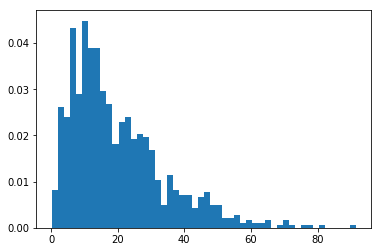

In [27]:
import numpy as np
x = np.random.gamma(2, 10, size = 1000)

plt.hist(x, bins = 50, density = True, cumulative = False)
plt.show()

Aprovechando lo que hemos aprendido, vamos a generar un gráfico que muestre la diferencia entre la *media* y *mediana*:

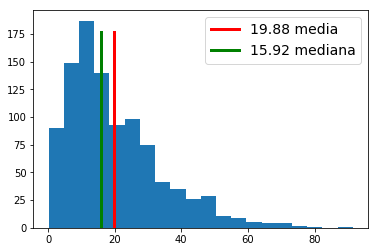

In [29]:
plt.hist(x, bins=20)
media   = np.mean(x)
mediana = np.median(x)

plt.axvline(media, ymax=.9, c='r', lw='3', label='{:.2f} media'.format(media))
plt.axvline(mediana, ymax=.9, c='g', lw='3', label='{:.2f} mediana'.format(mediana))
plt.legend(fontsize=14)
plt.show()

### Kernel Density Plot.

Este tipo de gŕafico es una forma suavizada de un histograma de frecuencias. Un gráfico *KDE* se dibuja de la siguiente forma: se reemplaza cada dato por una distribución *Gaussiana* y luego se suman todas las Gaussianas. En vez de una distribución Gaussiana, es posible usar otras distribuciones. El nombre genérico para esas distribuciones cuya suma se usa como aproximación de una función es el del *kernel*. Cualquier función simétrica cuya *integral* sea 1 puede ser usada como kernel. La Gaussiana es una de los kernels más usados.

De forma análoga a lo que sucede con los *bins*, los KDE son sensibles a un parámetro llamado `bandwith`. Existen varias *heurísticas* (reglas empíricas que suelen funcionar bien en la práctica) para ajustar el `bandwith` de forma automática de acuerdo a los datos.

Es posible usar *matplotlib* para graficar un *kde*, pero no existe una función que lo haga de forma automática. Es decir es posible pero requiere de cierto trabajo. Lo mismo sucede con otros tipos de gráficos usados para analizar datos, es por ello que existe una biblioteca llamada *Seaborn*, la cual no es más que una colección de funciones escritas usando *matplotlib*. Si prestan atención a la primera línea de la siguiente celda verán que importamos `seaborn` de la siguiente forma:

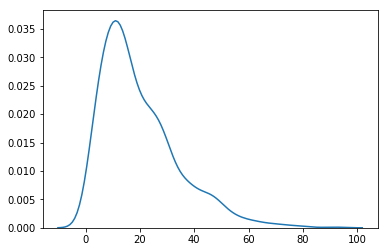

In [32]:
sns.kdeplot(x)
plt.show()

Como *Seaborn* está escrito usando *Matplotlib*, podemos modificar los gráficos realizados con *Seaborn* usando *Matplotlib*. Un sencillo ejemplo que muestra que esto es posible es el siguiente:

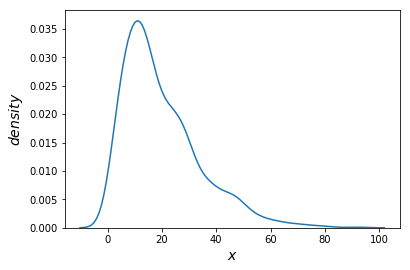

In [37]:
sns.kdeplot(x)
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$density$', fontsize = 14)
plt.show()

### Stripplot.

Este tipo de gráficos sirve para visualizar un conjunto de datos donde una variable es métrica y las demás son categóricas.

Para visualizarlos podemos usar la función `strippplot` de *Seaborn* (un gráfico similar es el *swarmplot*). Los *stripplot* se suelen graficar agregado un poco de *ruido/fluctuaciones* (*jitter* en inglés) en lo largo del eje de las $x$; esto es simplemente un truco para facilitar la visualización de los puntos, que caso contrario caerían todos en una misma linea ya que las variables categóricas no tienen dispersión.

Puede ser útil en sí mismo o puede ser usado superpuesto sobre un *boxplot* o *violinplot*.

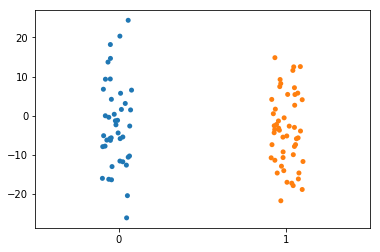

In [39]:
y0 = np.random.normal(0, 10, size = 42)
y1 = np.random.normal(-1, 10, size = 50)
sns.stripplot(data = [y0, y1], jitter = True)
plt.show()

### Box Plots (Wisker-plot o Gráficos de cajas o de bigotes).

Los [gráficos de caja](https://es.wikipedia.org/wiki/Diagrama_de_caja) son una forma de graficar distribuciones basadas en cuartiles. Al igual que el *stripplot*, este tipo de gráficos es muy útil cuando se quieren comparar varios grupos de datos en simultáneo. La *caja* está delimitada por el primer y tercer *cuartil*, mientras que la línea dentro de la caja es el segundo cuartil (la mediana). Los *bigotes* pueden indicar varias medidas, por eso es siempre importante leer/escribir la leyenda o texto que acompaña a un *boxplot*, a veces se usa una desviación estandard, otras veces los percentiles 2 y 98, otras veces (como en el gráfico a continuación) es una función del rango *intercuartil* y los valores por fuera de los bigotes se suelen considerar como *datos aberrantes* (ver más adelante).

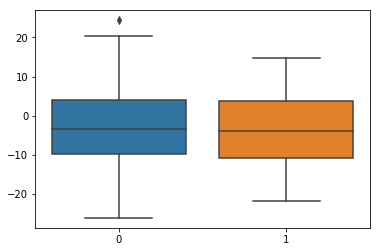

In [41]:
sns.boxplot(data = [y0, y1])
plt.show()

### Violin Plots (Gráficos de violín).

Los [gráficos de violín](https://en.wikipedia.org/wiki/Violin_plot) son una combinación de gráficos de caja con kde:

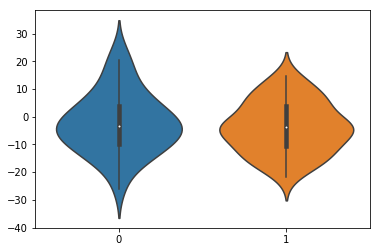

In [43]:
sns.violinplot(data = [y0, y1])
plt.show()

## Subplots.

Es posible tener más de un gráfico en una figura, tal y como se muestra el siguiente código:

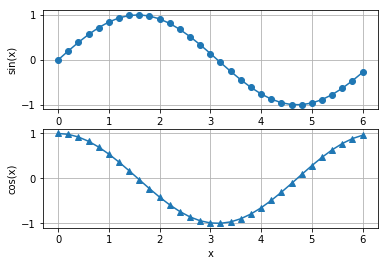

In [65]:
x = np.arange(0.0, 6.2, 0.2)

plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x), "o-")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x),"^-")
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.grid(True)

plt.show()

La función `subplot(rows, cols, plot_number)` establece una ventana de *subplot* dentro de la figura actual. Los parámetros `rows` (filas) y `cols` (columnas) dividen la figura en una cuadrícula de filas x columnas subtramas (en el gráfico anterior, dos filas y una columna).

## Datos Aberrantes (*outliers*).

Los *datos aberrantes* (*outliers*) son valores que están muy alejados de la mayoría de los valores de una distribución. Los *datos aberrantes* pueden ser errores de medición, errores al procesar los datos o incluso valores correctos pero inusuales (sobre todo cuando la muestra es pequeña). Siempre es buena idea revisar si nuestros datos contienen datos aberrantes y en muchos casos puede llegar a ser conveniente removerlos. **Siempre que se remueve un dato aberrante deberá reportarse que fue removido y explicar cuál fue el criterio usado para removerlo**. Es importante destacar que la decisión de remover datos aberrantes no debe ser tomada a la ligera. Si un supuesto dato aberrante fuese un valor correcto quizá nos estaría indicando que no comprendemos del todo el fenómeno estudiado y al dejarlo de lado podríamos estar perdiéndonos de un importante descubrimiento.

Uno de los criterios más usados para detectar los *outliers* es la *Regla Gaussiana*: todo valor por debajo de $\mu$ - n$\sigma$ y por encima de $\mu$ + n$\sigma$, con $n = 1, 2, 3 ...$ es un *outlier*. Este criterio suele usarse para distribuciones que se asemejan a Gaussianas.

La *Regla de Chebyshev* es un método más general para detectar los *outliers*, ya que el *rango intercuartil* es una medida más robusta de la dispersión de una distribución que la desviación estándar. Según la desigualdad de Chebyshev, al menos  $1 - \frac{1}{k^2}$ de los valores de una distribución están dentro $k$ desviaciones estandard. Es decir, casi todos los valores de una distribución de probabilidad están cerca de la media. Por lo tanto, el 75% y el 89% de los valores de una distribución se encuentran dentro de 2 y 3 desviaciones estandard, respectivamente. La desigualdad de Chebyshev indica una cota, para varias distribuciones es posible que los valores se encuentren mucho más concentrados alrededor de la media; por ejemplo, esto sucede con las curvas Gaussianas. Para una curva Gaussiana se cumple la *regla 68-95-99.7*; es decir, el *68%* de los datos se encuentran dentro de 1 desviación estandard, el *95%* dentro de 2 y el *99.7%* dentro de 3.

## Relación entre dos variables.

Los gráficos que hasta ahora hemos visto sirven para visualizar una variable por vez, (aunque `sns.kdeplot()` soporta la visualización de dos variables). En muchos casos necesitamos entender la relación entre dos variables. Dos variables están inter-relacionadas, si el conocer el valor de una de ellas provee de información sobre el valor de la otra.

### Gráfico de dispersión.

Un [gráfico de dispersión](https://es.wikipedia.org/wiki/Diagrama_de_dispersión) es un gráfico científico que utiliza las coordenadas cartesianas para mostrar los valores de dos variables en simultáneo. Estos gráficos son la forma más simple de visualizar la relación entre dos variables.

Supongamos que tenemos dos variables, que creativamente llamaremos $x$, $y$.

In [44]:
x = np.random.normal(size = 1000)
y = np.random.normal(loc = x, scale = 1)

Usando *Matplotlib* podemos graficar ambas variables usando la función `scatter`:

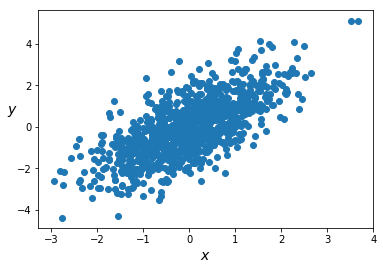

In [49]:
plt.scatter(x, y, alpha = 1)
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14, rotation = False)
plt.show()

La librería *Seaborn* provee múltiples opciones para visualizar relaciones entre dos variables, varias de ellas están contenidas en la función `joinplot`. Esta función, además de mostrar el gráfico de dispersión, muestra las distribuciones marginales de $x$ e $y$:

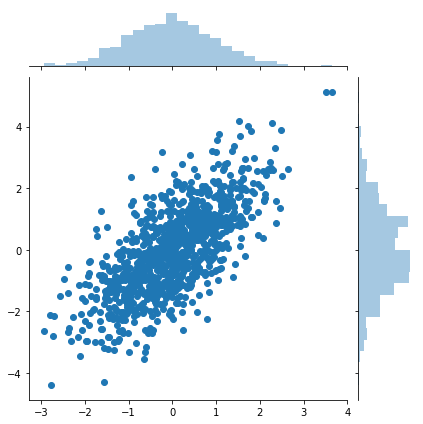

In [53]:
sns.jointplot(x, y,  kind = 'scatter', stat_func = None)
plt.show()

El siguiente gráfico usa un *kernel density estimation* como vimos anteriormente, lo hace tanto para las distribuciones marginales como para la distribución conjunta:

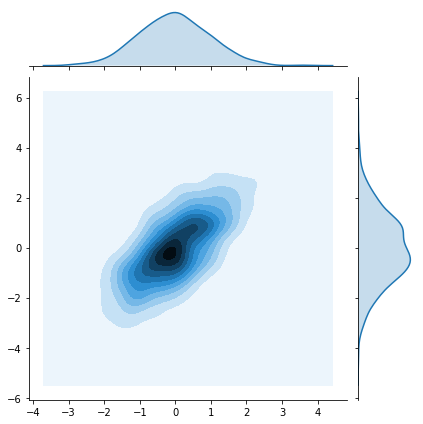

In [55]:
sns.jointplot(x, y,  kind = 'kde', stat_func = None)
plt.show()

Un gráfico de *hexbin* es similar a un histograma, pero bidimensional. El nombre se debe a que los datos son agrupados en celdas hexagonales. ¿Por qué hexágonos en vez de cuadrados o triángulos? Simplemente por que las celdas hexagonales introducen una menor distorsión en los datos que otras opciones. Esto se debe a las siguientes razones:

* Los hexágonos se relacionan con sus vecinos por lados (los cuadrados y triángulos lo hacen por vértices y lados). Es decir se vinculan con sus vecinos de forma más simétrica.
* Los hexágonos son el polígono con mayor número de lados que mejor cubren (*teselan*) una superficie plana.
* Los hexágonos introducen menor distorsión visual que por ejemplo los cuadrados. Una malla cuadrada nos hace que tendamos a mirar en sentido horizontal y vertical.

Los *hexbin* son útiles cuando necesitamos visualizar muchos datos. Por muchos nos referimos a números por encima de las centenas de miles de datos. Cuando tenemos una gran cantidad de datos, los puntos empiezan a superponerse y puede que ciertos patrones pasen desapercibidos, por lo que visualizar datos agrupados y no los datos crudos suele ser buena idea. Además calcular los *hexbin* tiene un costo menor que los KDE:

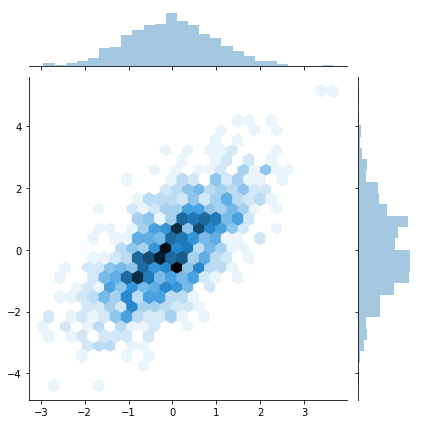

In [56]:
sns.jointplot(x, y,  kind = 'hex', stat_func = None)  # Ver también plt.hexbin()
plt.show()

Una alternativa para evitar que algunos puntos opaquen al resto, en un gráfico de dispersión común, es hacer los puntos semitransparentes. En *Matplotlib* la transparencia de los objetos es controlada mediante un parámetro llamado `alpha` que va entre $0$ y $1$. Este es un buen momento para volver algunas celdas atrás y ver cómo este y otros parámetros pueden ser usados para modificar las gráficas realizadas.

### Correlación.

Al trabajar con dos variables resulta por lo general interesante preguntarse por la relación entre ellas. Decimos que dos variables están relacionadas si una provee información sobre la otra. Si en cambio una variable no ofrece información sobre la otra decimos que son *independientes*.

La *correlación* es una medida de la dependencia de dos variables. Existen varios coeficientes de correlación, el más comunmente usado es el [*Coeficiente de Correlación de Pearson*](https://es.wikipedia.org/wiki/Coeficiente_de_correlación_de_Pearson). Este coeficiente solo sirve para medir **relaciones lineales** entre variables. El coeficiente de correlación de Pearson es el resultado de dividir la covarianza de las dos variables por el producto de sus desviaciones estándar:

$$\rho_(x, y) = \frac{E[(x - \mu_x)(y - \mu_y)]}{\sigma_x\sigma_y}$$

En palabras (que puede ser más oscuro que en fórmulas), el coeficiente de correlación de Pearson indica cómo varia una variable al variar la otra respecto de la variación intrínseca de cada una de las variables.

¿Por qué usar el coeficiente de Pearson y no directamente la covarianza? Por que al dividir por el producto de las varianzas estámos estandarizando el coeficiente y por lo tanto simplificando su interpretación al hacerlo independiente de la unidades de nuestras variables. Al dividir por las desviaciones estándar, obtenemos una cantidad que varía entre -1 y 1 y que no tiene dimensiones.

La función `joinplot`, que vimos en el apartado anterior, por defecto nos devuelve el valor del coeficiente de correlación de Person, junto con un valor $p$ cuyo significado estudiaremos más adelante.

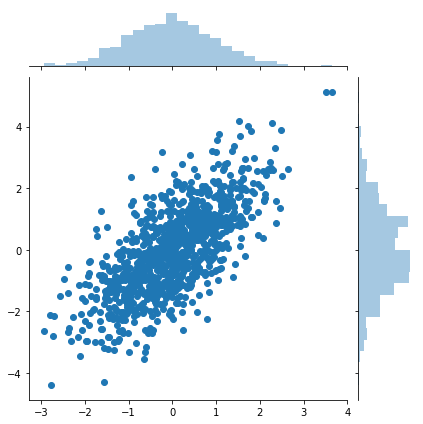

In [58]:
sns.jointplot(x, y,  kind = 'scatter')
plt.show()

Identificar correlaciones puede ser útil para entender cómo dos variables se relacionan y para predecir una a partir de la otra. Es por ello que muchas veces además de visualizar la relación entre variables se estiman modelos que ajustan a los datos; como por ejemplo líneas rectas. Veremos ahora como *Seaborn* ajusta los datos a una línea recta:

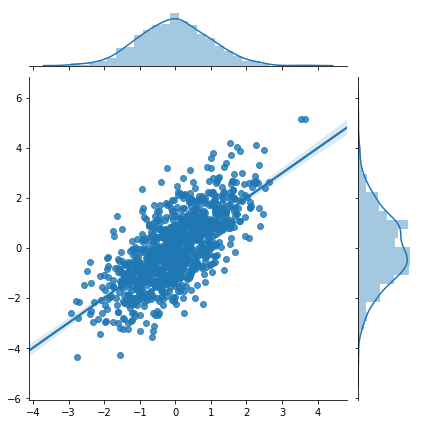

In [59]:
sns.jointplot(x, y,  kind = 'reg')
plt.show()

### Correlación y causalidad.

Si existe algún tipo de mecanismo que hace que una variable dependa de otra deberá existir correlación (aunque no necesariamente lineal). Pero lo opuesto no es siempre cierto, dos variables pueden estar correlacionadas sin que exista ningún tipo de mecanismo que las vincule. Dado el gran conjunto de variables que es posible medir no debería ser sorprendente que existan correlaciones espurias.

Para poder establecer una **relación causal** a partir de una correlación, hace falta establecer antes y probar la existencia de un mecanismo que vincule ambas variables.

## Referencias adicionales.

Para ver operaciones adicionales de *Matplotlib* podemos consultar los siguientes repositorios:
* [Basics of Matplotlib and Seaborn.](https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Pandas%20and%20Numpy/Matplotlib_Seaborn_basics.ipynb)
* [Tools Matplotlib.](https://github.com/ageron/handson-ml2/blob/master/tools_matplotlib.ipynb)